In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
df=pd.read_csv('clean_data.csv')

In [3]:
df

,suicides/100k pop,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,18.88,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,0,1
1,7.66,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,1,0,0,0
2,6.25,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,1,0
3,5.23,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,1,0,0,0,0,0,0,1
4,5.22,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,2.96,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,1,0,0,0
6532,2.58,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,0,0,0,1
6533,2.17,6.049,8.659,0.952,64.0,0.954,0.061,0.536,0,1,0,0,0,1,0,0
6534,1.67,6.049,8.659,0.952,64.0,0.954,0.061,0.536,1,0,0,0,0,1,0,0


In [4]:
x = df.drop(columns=['suicides/100k pop'])
x.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,0,1
1,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,1,0,0,0
2,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,0,0,0,1,0
3,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,1,0,0,0,0,0,0,1
4,4.634,9.142,0.821,65.8,0.529,-0.009,0.875,0,1,0,1,0,0,0,0


In [5]:
y = df['suicides/100k pop']
y.head()

0    18.88
1     7.66
2     6.25
3     5.23
4     5.22
Name: suicides/100k pop, dtype: float64

# Linear Regression

## Linear Regression Multiple Variable

In [6]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=37)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

Intercept of Regression 	: b =  -36.599355738659305
Coefficients of Regression 	: a =  [ -2.10705822   3.57090816  42.51583623  -0.14666195  -2.87417186
 -12.50106799   0.60883562  -7.44885335   7.44885335  -3.50286742
  -0.95614953   2.34002769 -11.26301125   3.29477915  10.08722136]



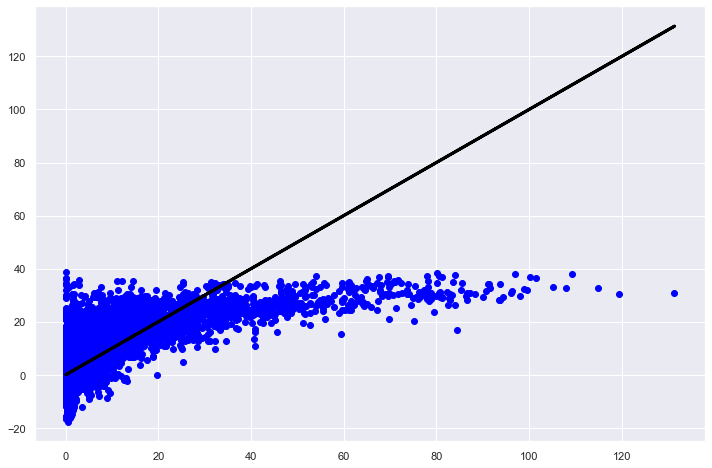

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43560490411395203
Mean Squared Error (MSE) 	: 145.6927231966317



In [7]:
# Plot the Predictions vs the True values
f = plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_pred, color = "blue")
plt.plot(y_train, y_train, 'black', linewidth = 3)
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

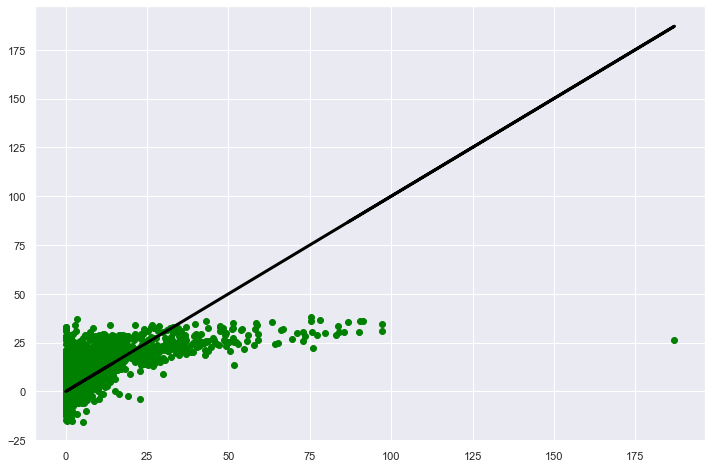

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3792488372840963
Mean Squared Error (MSE) 	: 142.24942348244423



In [8]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Linear Regression Specific Variable

### Sex and Age Bracket

In [9]:
selected_x = pd.DataFrame(x[['sex_female','sex_male','age_15-24 years','age_25-34 years','age_35-54 years','age_5-14 years','age_55-74 years','age_75+ years']])
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(selected_x, y, test_size = 0.25, random_state=37)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

Intercept of Regression 	: b =  -150248018010497.16
Coefficients of Regression 	: a =  [2.64797735e+13 2.64797735e+13 1.23768245e+14 1.23768245e+14
 1.23768245e+14 1.23768245e+14 1.23768245e+14 1.23768245e+14]



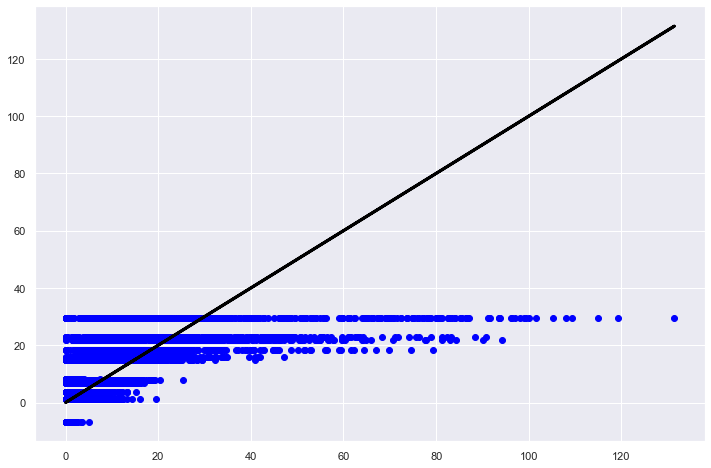

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3775344667549685
Mean Squared Error (MSE) 	: 160.6830025553983



In [10]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_pred, color = "blue")
plt.plot(y_train, y_train, 'black', linewidth = 3)
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

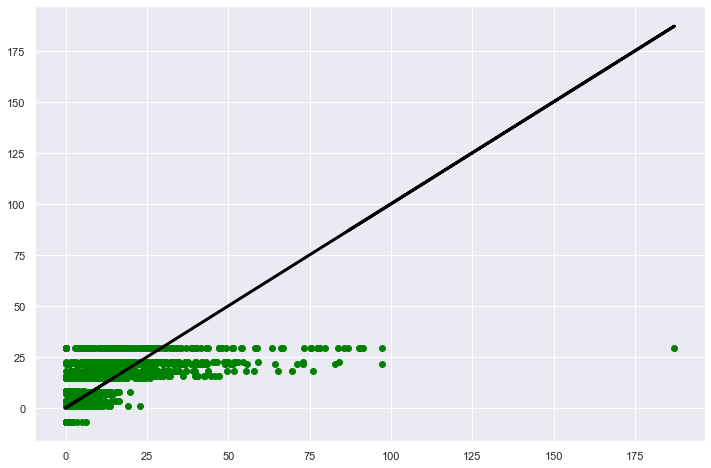

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3372136544669132
Mean Squared Error (MSE) 	: 151.88207643723226



In [11]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Countries

In [12]:
selected_x = pd.DataFrame(x[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption']])
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(selected_x, y, test_size = 0.25, random_state=37)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

Intercept of Regression 	: b =  -34.195633086855985
Coefficients of Regression 	: a =  [ -2.16672688   3.39668839  42.25266323  -0.14663277  -3.0144824
 -11.57064193   0.81067788]



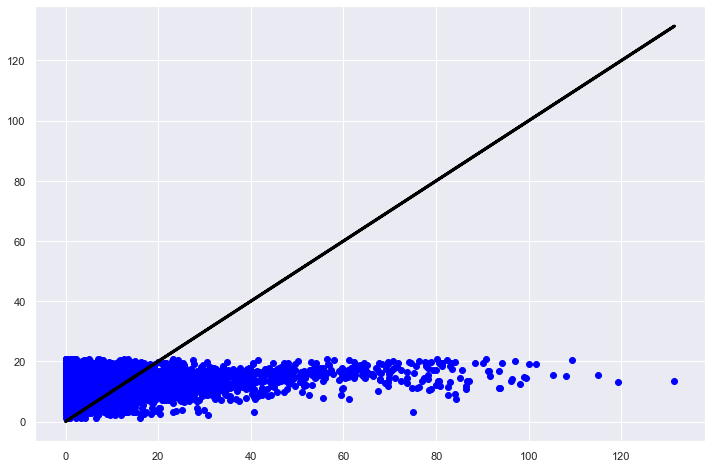

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05475364758190382
Mean Squared Error (MSE) 	: 244.00551347682227



In [13]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_train_pred, color = "blue")
plt.plot(y_train, y_train, 'black', linewidth = 3)
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

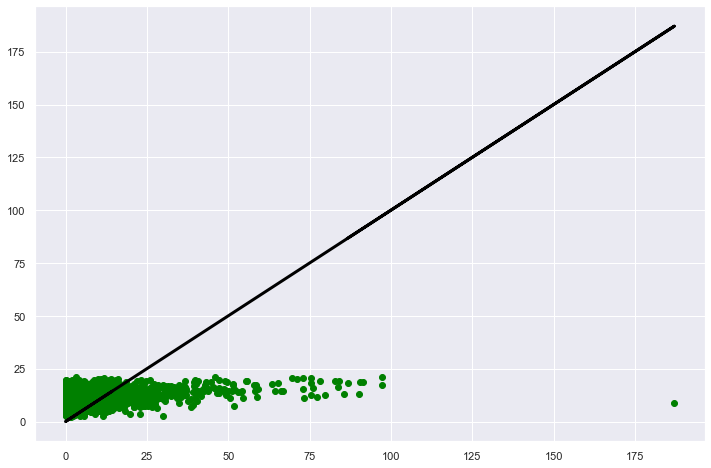

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.05194495042021052
Mean Squared Error (MSE) 	: 217.2533735455378



In [14]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

---
# KNeighbourhoodRegressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=37)

In [17]:
k_arr = []
for i in range(1,20,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)
    k_arr.append((i, test_score ,train_score))
dataframe_arr = pd.DataFrame(k_arr, columns=['K','Test Score','Train Score'])
print(dataframe_arr)

     K  Test Score  Train Score
0    1    0.583092     1.000000
1    2    0.662673     0.913172
2    3    0.682457     0.865351
3    4    0.657322     0.835662
4    5    0.658798     0.814289
5    6    0.647626     0.795328
6    7    0.644342     0.777416
7    8    0.641605     0.764541
8    9    0.630789     0.749307
9   10    0.625761     0.738751
10  11    0.617168     0.727432
11  12    0.604477     0.722969
12  13    0.599481     0.717181
13  14    0.593764     0.712757
14  15    0.590703     0.707566
15  16    0.584327     0.702743
16  17    0.582719     0.698270
17  18    0.581263     0.694664
18  19    0.583859     0.690009


In [18]:
rmse_arr = [] #to store rmse values for different k
for i in range(20):
    i = i+1
    model = KNeighborsRegressor(n_neighbors = i)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    err = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_arr.append(err) #store rmse values
    print(f'Root Mean Square Error for k={i}: {err}')

Root Mean Square Error for k=1: 9.210078813908694
Root Mean Square Error for k=2: 8.284546198484973
Root Mean Square Error for k=3: 8.037936124023194
Root Mean Square Error for k=4: 8.349993012252382
Root Mean Square Error for k=5: 8.331997590990357
Root Mean Square Error for k=6: 8.467308761631278
Root Mean Square Error for k=7: 8.506667544922642
Root Mean Square Error for k=8: 8.53933501449186
Root Mean Square Error for k=9: 8.667231890890543
Root Mean Square Error for k=10: 8.726048169429205
Root Mean Square Error for k=11: 8.825669254492743
Root Mean Square Error for k=12: 8.970756186422365
Root Mean Square Error for k=13: 9.027238196829552
Root Mean Square Error for k=14: 9.09143855614321
Root Mean Square Error for k=15: 9.125620367128327
Root Mean Square Error for k=16: 9.196425213933125
Root Mean Square Error for k=17: 9.214196581945204
Root Mean Square Error for k=18: 9.230258888461657
Root Mean Square Error for k=19: 9.201603727920464
Root Mean Square Error for k=20: 9.1797433

<AxesSubplot:>

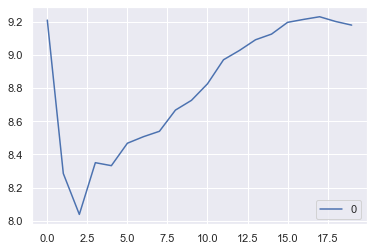

In [19]:
f = pd.DataFrame(rmse_arr) #elbow curve 
f.plot()

In [20]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [21]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print(knn.score(x_test, y_test))

0.6824570358624201


In [23]:
y_predict=knn.predict(x_test)

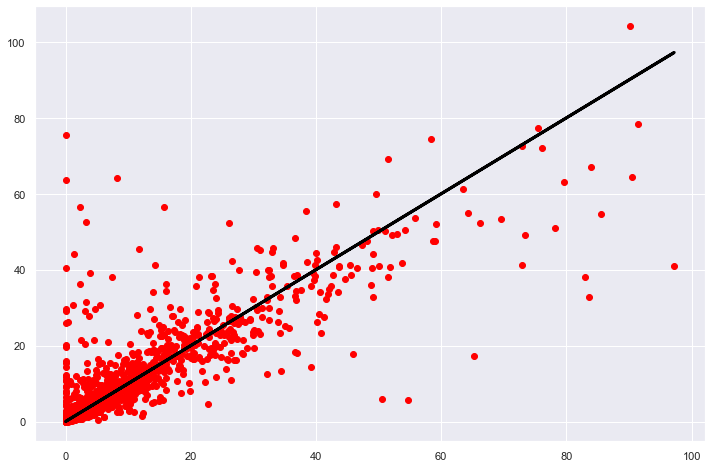

In [24]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_predict, color = "red")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()

In [25]:
r2_score(y_predict,y_test)

0.6443231889983331

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test))

In [27]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=3)

In [28]:
print(knn.score(x_test_scaled, y_test))

0.7454876400972273


In [29]:
y_predict_scaled=knn.predict(x_test+scaled)

NameError: name 'scaled' is not defined

In [ ]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_predict_scaled, color = "red")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()

---
# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=37)

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 37)
rf.fit(x_train, y_train)
print(f"Train:{rf.score(x_train,y_train)} Test:{rf.score(x_test,y_test)}")

In [ ]:
print(rf.score(x_test, y_test))

In [ ]:
y_predict=rf.predict(x_test)

In [ ]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_predict, y_test, color = "purple")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()

In [ ]:
r2_score(y_predict,y_test)

## Gradient Boosting Regression

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth': [4, 6],
            'min_samples_leaf': [3, 5, 9, 17],
            'max_features': [1.0, 0.3, 0.1]
}
gb = GradientBoostingRegressor()

model = GridSearchCV(gb, params, cv=5, n_jobs=-1)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
gb = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.1, max_depth = 6,max_features = 1.0, min_samples_leaf = 3)
gb.fit(x_train,y_train)

In [ ]:
gb.score(x_test, y_test)

In [ ]:
y_predict=gb.predict(x_test)

In [ ]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_predict, color = "red")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()

In [ ]:
r2_score(y_predict,y_test)

## Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test))

reg1 = KNeighborsRegressor(n_neighbors=3)
reg1.fit(x_train_scaled,y_train)

reg2 = RandomForestRegressor(n_estimators = 1000, random_state = 37)
reg2.fit(x_train,y_train)

reg3 = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.1, max_depth = 6,max_features = 1.0, min_samples_leaf = 3)
reg3.fit(x_train,y_train)

reg4 = VotingRegressor([("knn", reg1), ("rf", reg2), ("gb", reg3)])
reg4.fit(x_train,y_train)

In [ ]:
xt = x_test[:50]
xt_scaled =x_test_scaled[:50]

pred1 = reg1.predict(xt_scaled)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = reg4.predict(xt)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(pred1, "bo", label="KNeighborsRegressor")
plt.plot(pred2, "go", label="RandomForestRegressor")
plt.plot(pred1, "yo", label="GradientBoostingRegressor")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [ ]:
reg4.score(x_test, y_test)

In [ ]:
y_predict=reg4.predict(x_test)

In [ ]:
f = plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_predict, color = "chocolate")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()

In [ ]:
r2_score(y_predict,y_test)

## Conclusion

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test))

In [ ]:
f = plt.figure(figsize=(12, 8))

pred1 = reg1.predict(x_test_scaled)
pred2 = reg2.predict(x_test)
pred3 = reg3.predict(x_test)
pred4 = reg4.predict(x_test)

plt.scatter(pred1, y_test, color = "tab:blue")
plt.scatter(pred2, y_test, color = "tab:orange")
plt.scatter(pred3, y_test, color = "tab:green")
plt.scatter(pred4, y_test, color = "tab:red")
plt.plot(y_test, y_test, 'black', linewidth = 3)
plt.show()

In [ ]:
print(reg1.score(x_test_scaled, y_test))
print(reg2.score(x_test, y_test))
print(reg3.score(x_test, y_test))
print(reg4.score(x_test, y_test))